In [1]:
#add spex templates to selection function
#select the highest SNR spectra of each spectral type i.e 

In [2]:
import splat
import wisps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import numba
%matplotlib inline

In [3]:
splat.initializeStandards()

In [4]:
spts=np.array([splat.typeToNum(x) for x in np.arange(16, 42)])

In [5]:
spts

array(['M6.0', 'M7.0', 'M8.0', 'M9.0', 'L0.0', 'L1.0', 'L2.0', 'L3.0',
       'L4.0', 'L5.0', 'L6.0', 'L7.0', 'L8.0', 'L9.0', 'T0.0', 'T1.0',
       'T2.0', 'T3.0', 'T4.0', 'T5.0', 'T6.0', 'T7.0', 'T8.0', 'T9.0',
       'Y0.0', 'Y1.0'], dtype='<U4')

In [6]:
splat_db=splat.searchLibrary(vlm=True, giant=False, young=False)

In [7]:
df=splat_db[splat_db.SPEX_TYPE.isin(spts)]

In [8]:
splat_within_snr=df[df.MEDIAN_SNR.between(50, 200)]

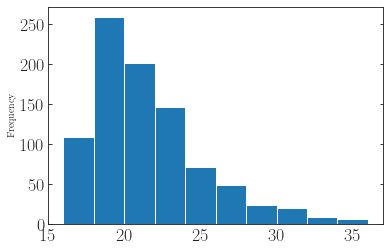

In [9]:
splat_within_snr.SPEX_TYPE.apply(splat.typeToNum).plot(kind='hist', bins=10)

## Group by spt and pick the Top 30

In [10]:
groups=splat_within_snr.sort_values('MEDIAN_SNR',ascending=False).groupby('SPEX_TYPE')

In [11]:
picks=[]
for g in groups:
    picks.append(g[1].nlargest(20,'MEDIAN_SNR'  ))

In [12]:
df_picks=pd.concat(picks)

Text(0.5, 0, 'SNR')

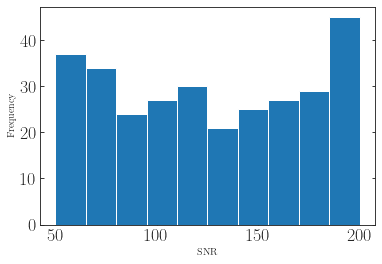

In [13]:
df_picks['MEDIAN_SNR' ].plot(kind='hist')
plt.xlabel('SNR')

In [14]:
import splat

In [15]:
plt.scatter(df_picks.MEDIAN_SNR, df_picks.SPEX_TYPE.apply(splat.typeToNum))

In [16]:

def create_splat_source(filename):
    try:
        #create a wisps spectrum
        #retrieve splat spectrum

        splat_s=splat.getSpectrum(filename=filename)[0]
        spt=splat.typeToNum(splat_s.spex_type)

        #create a source object
        s=wisps.Spectrum( 
                       wave=splat_s.wave.value, 
                       flux=splat_s.flux.value,
                      noise=splat_s.noise.value)

        s.normalize()
        return s
    except OSError:
        return 

In [17]:
import wisps

In [18]:
df_picks['spt']=df_picks.SPEX_TYPE.apply(wisps.make_spt_number)

In [19]:
df_picks=df_picks.sort_values(by='spt')

In [20]:
#df_picks

In [21]:
%%capture
spectra=df_picks.DATA_FILE.apply(create_splat_source)

In [22]:
splat.initializeStandards()

In [23]:
splat.STDS_DWARF_SPEX['L0.0']

SPEX-PRISM spectrum of 2MASP J0345432+254023 (L0.0)

In [24]:
spectra[0].spt

'Y1.0'

In [25]:
def plot_sp_sp(s, ax):
    std=splat.STDS_DWARF_SPEX[s.spt]
    std.normalize(waverange=[1.1, 1.7])
    mask2=np.logical_and(std.wave.value>0.8, std.wave.value<1.7)
    ax.plot(std.wave.value[mask2], std.flux.value[mask2], linestyle='--')
    
    mask=np.logical_and(s.wave>0.8, s.wave<1.7)
    ax.plot(s.wave[mask], s.flux[mask])
    ax.set_title("{} {} ".format(str(idx),s.spt ))


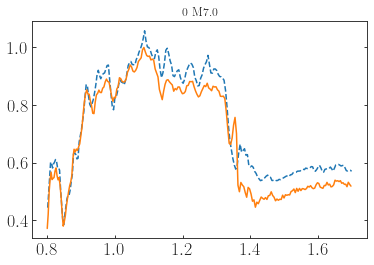

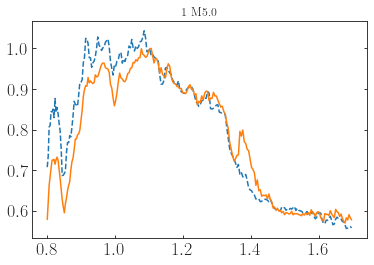

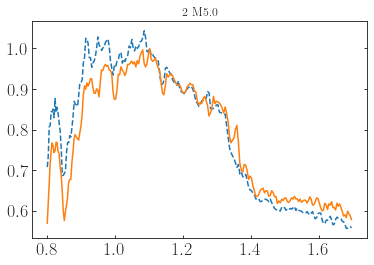

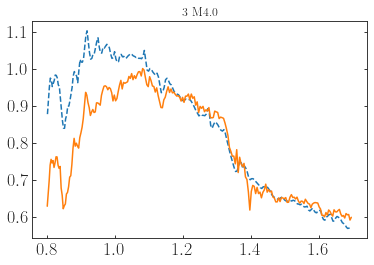

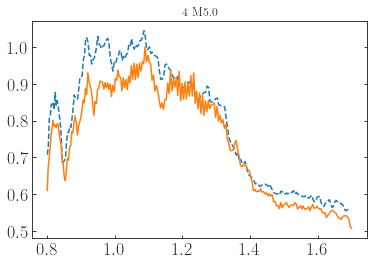

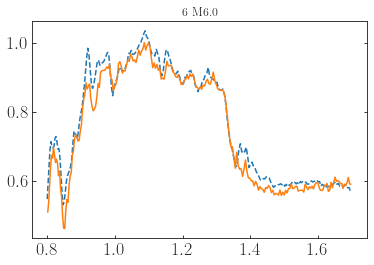

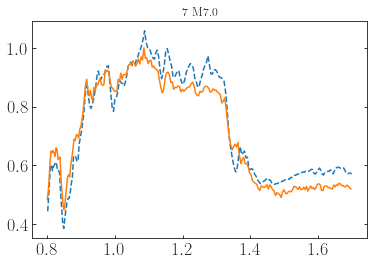

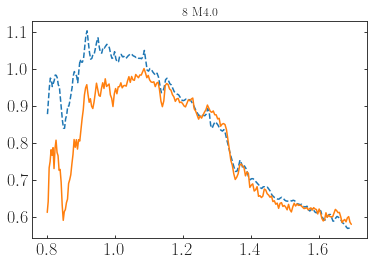

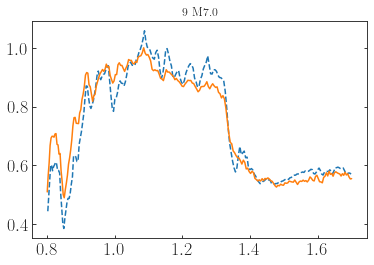

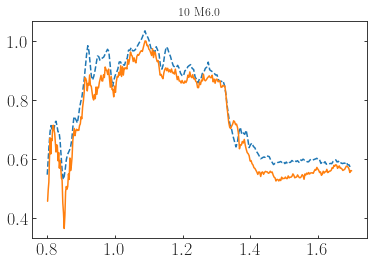

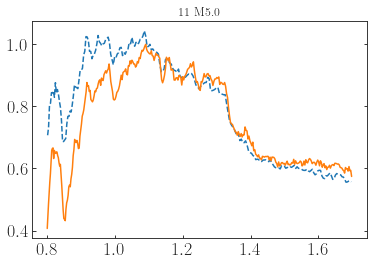

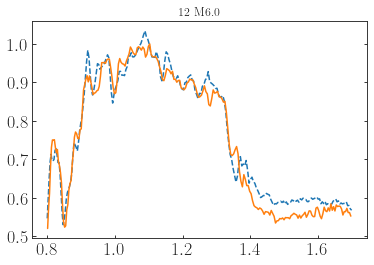

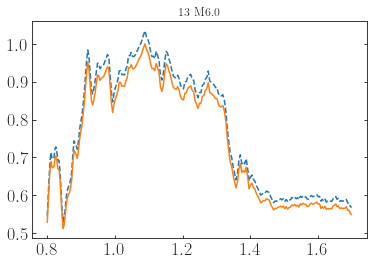

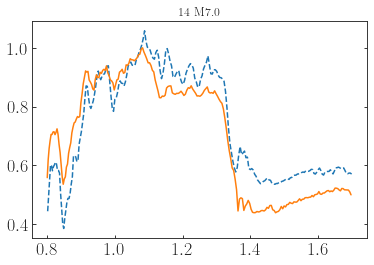

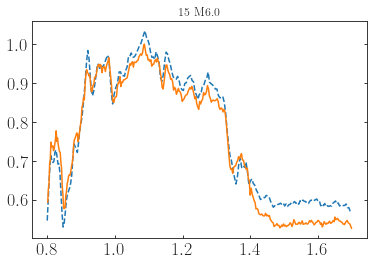

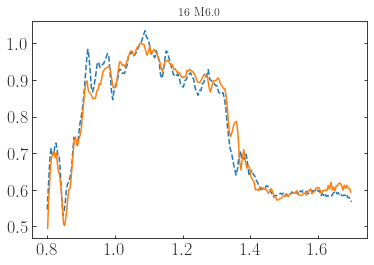

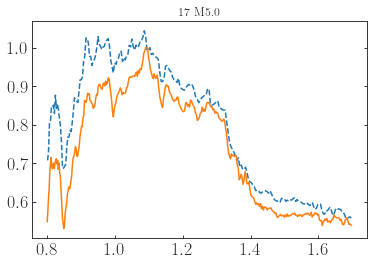

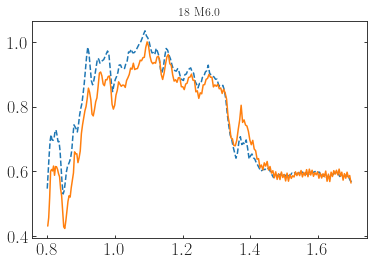

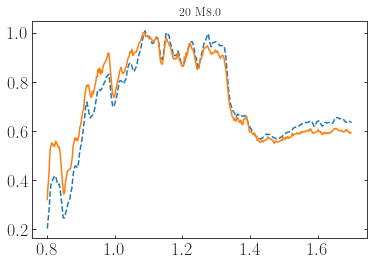

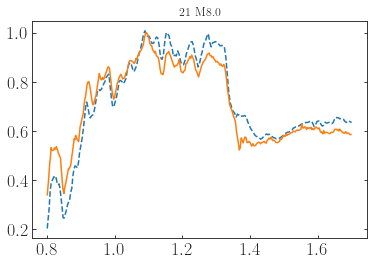

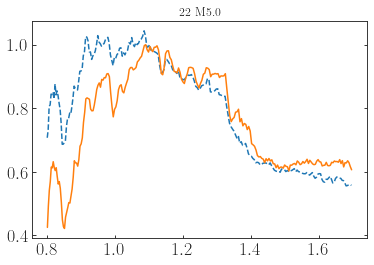

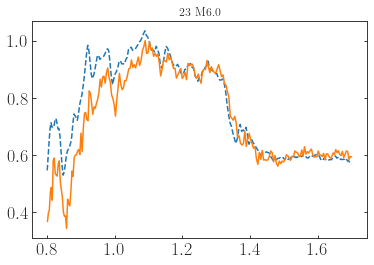

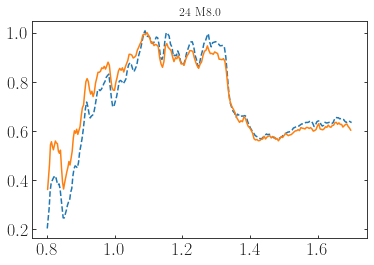

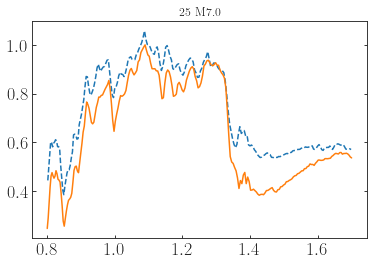

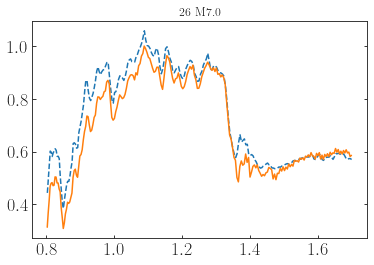

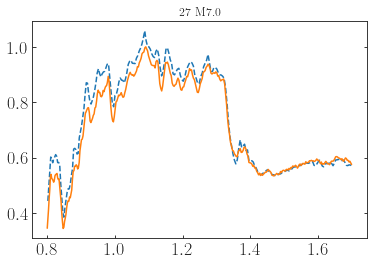

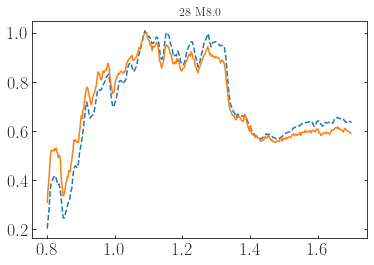

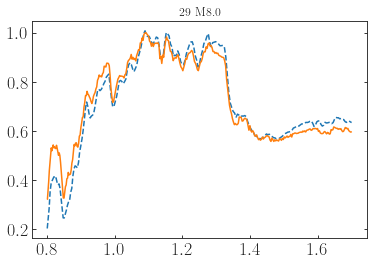

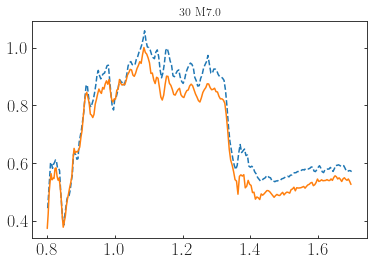

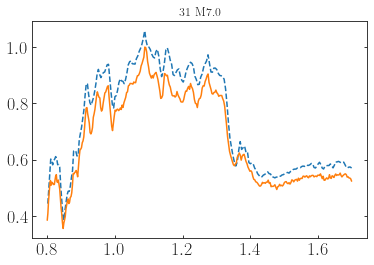

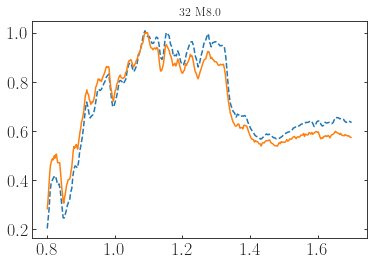

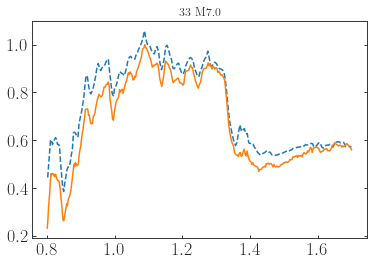

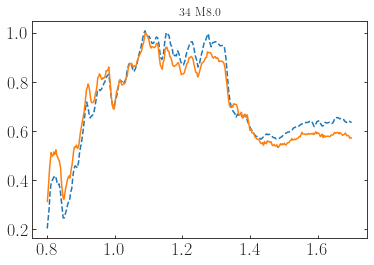

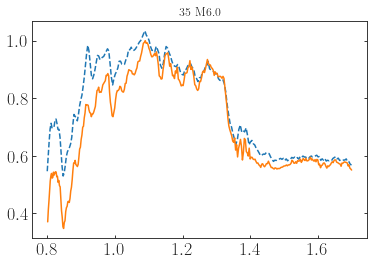

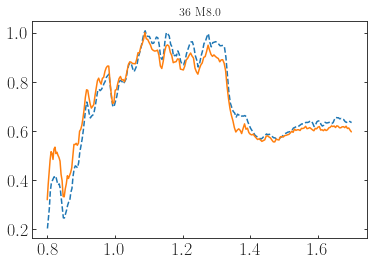

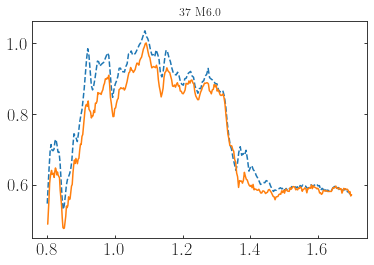

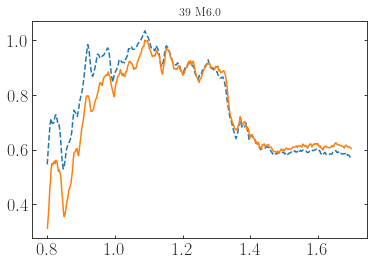

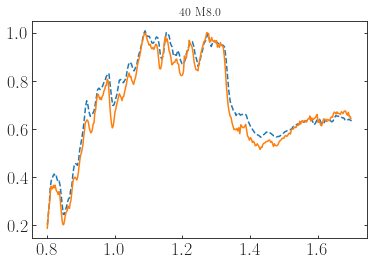

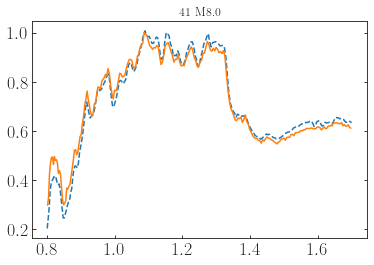

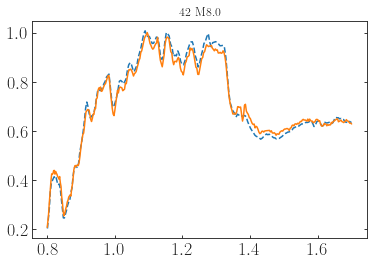

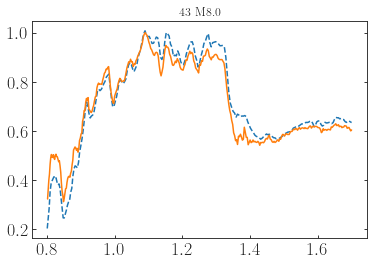

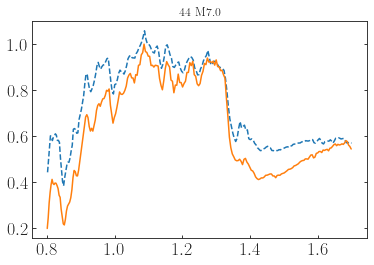

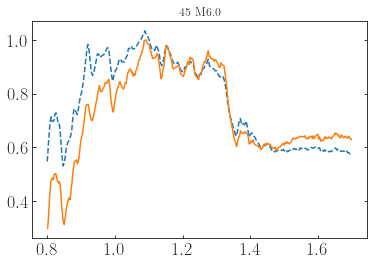

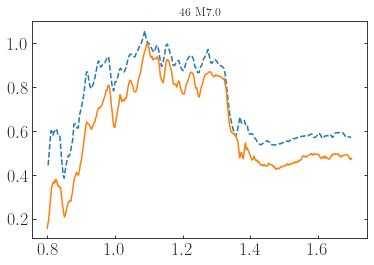

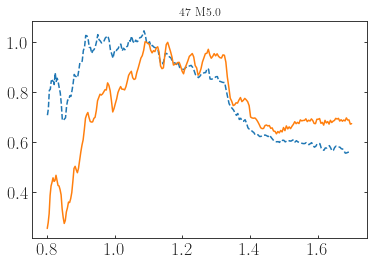

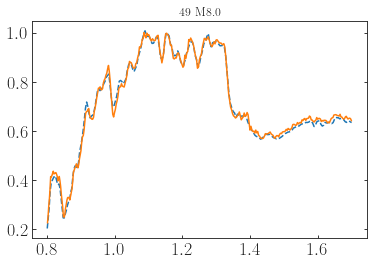

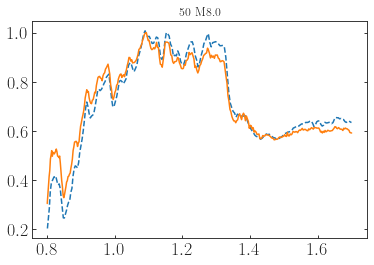

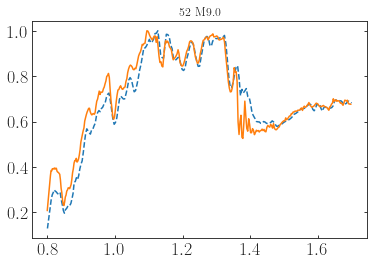

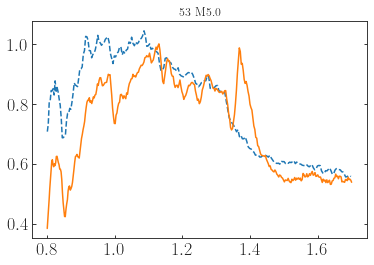

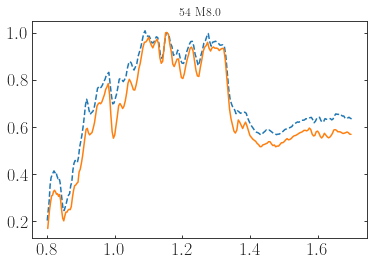

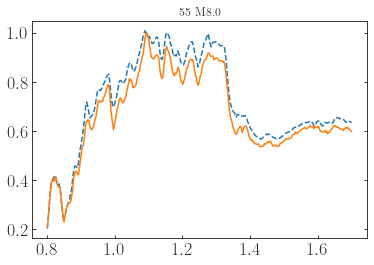

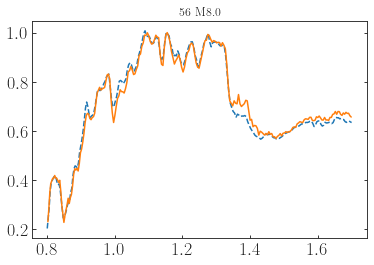

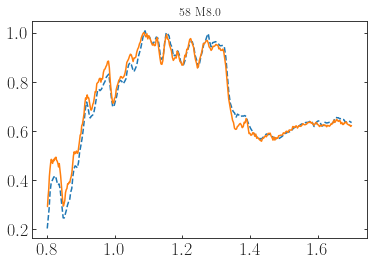

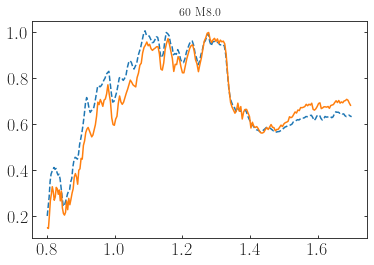

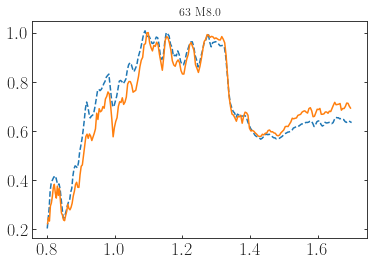

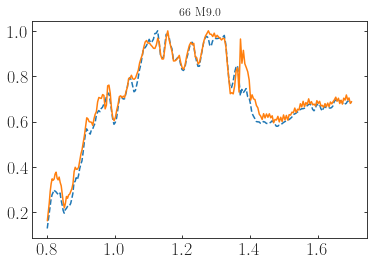

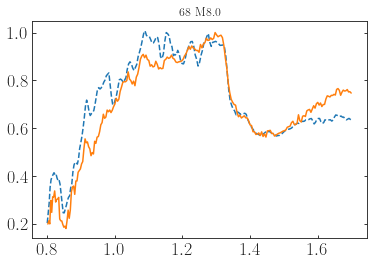

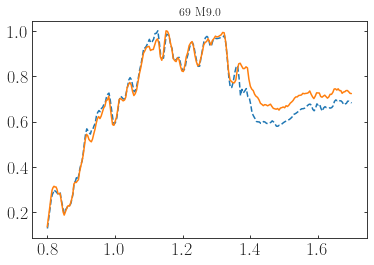

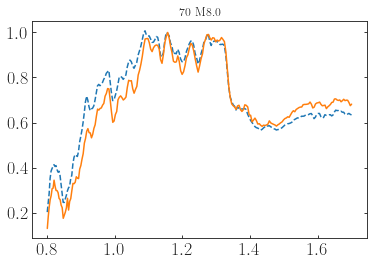

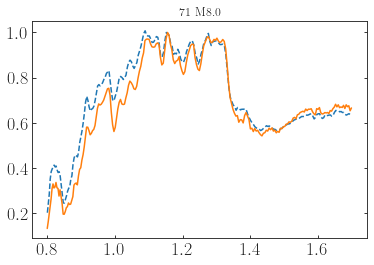

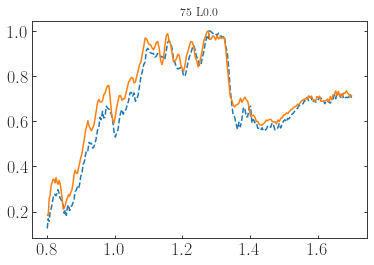

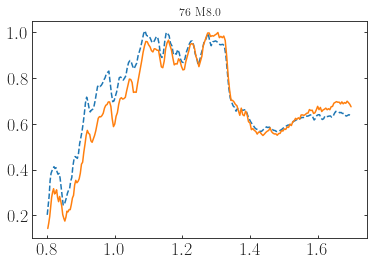

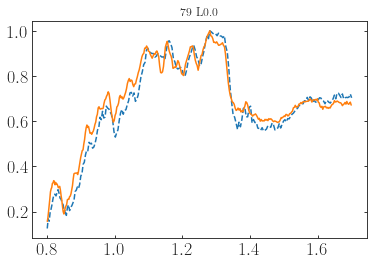

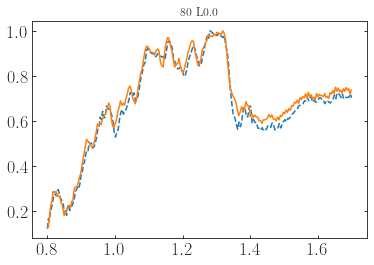

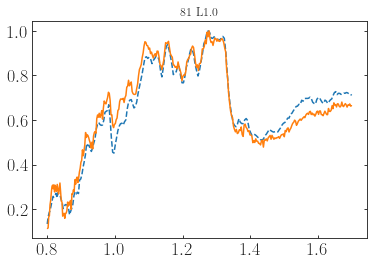

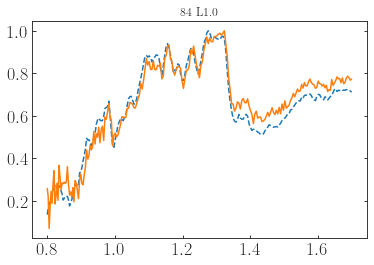

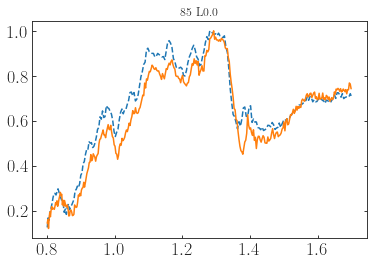

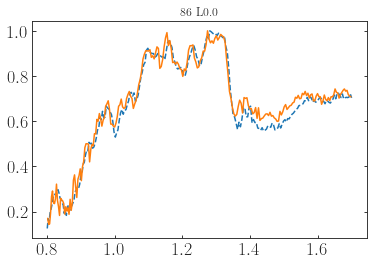

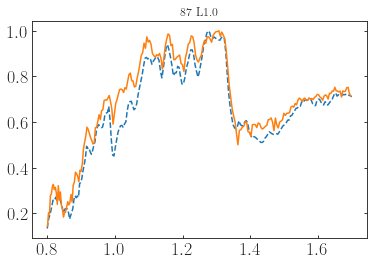

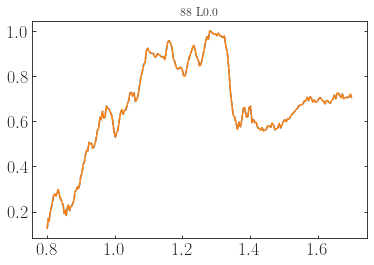

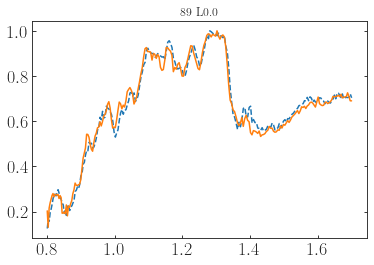

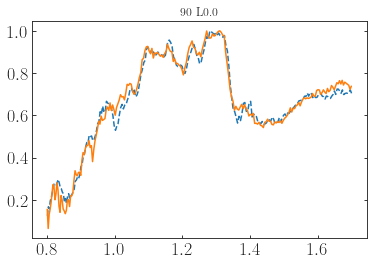

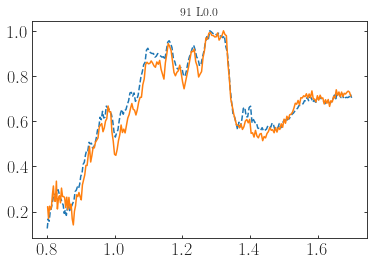

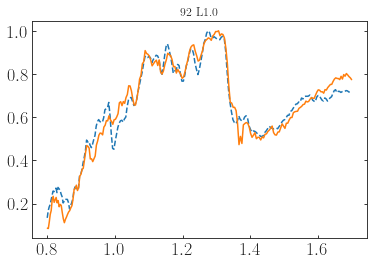

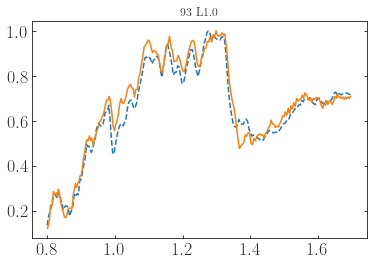

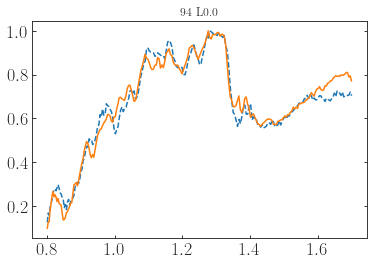

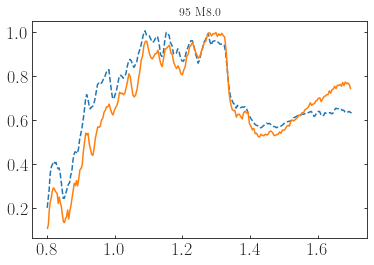

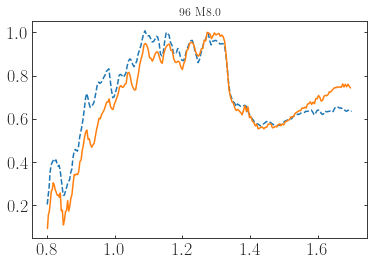

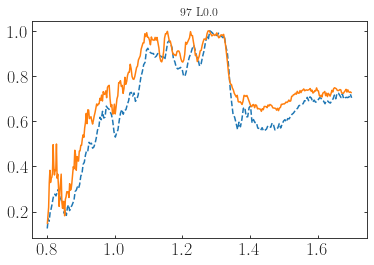

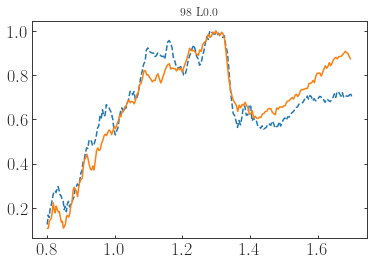

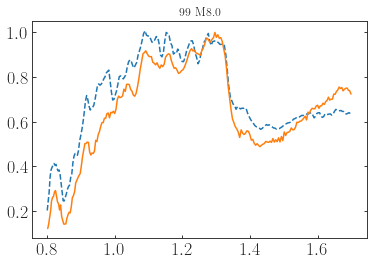

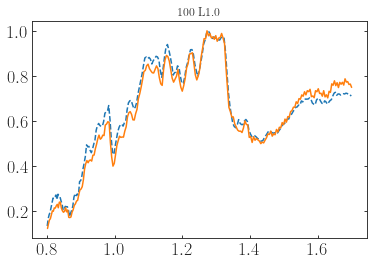

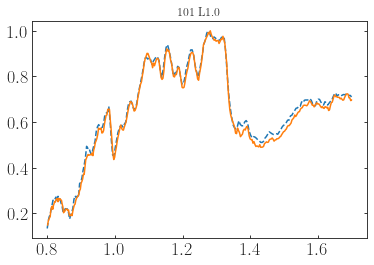

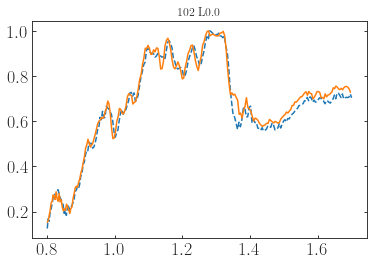

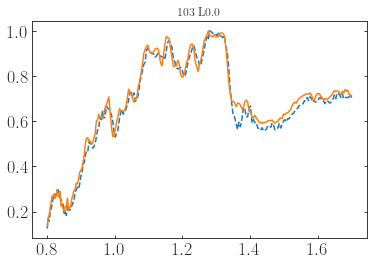

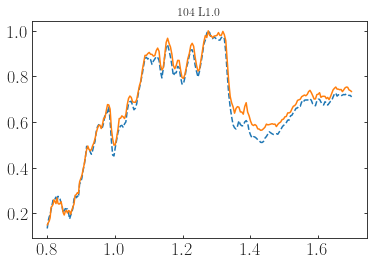

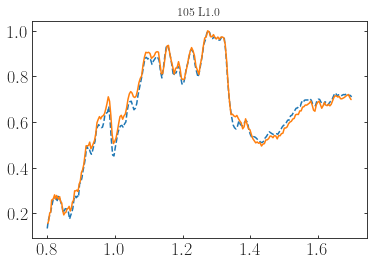

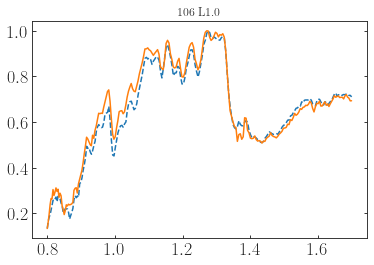

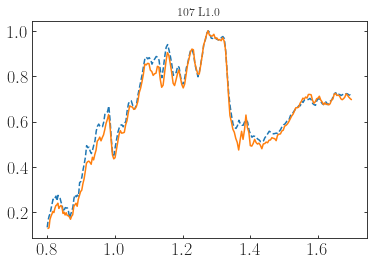

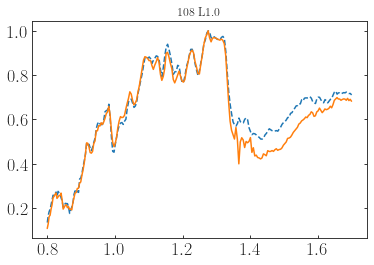

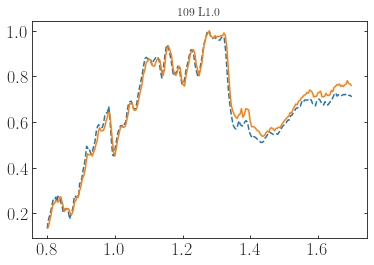

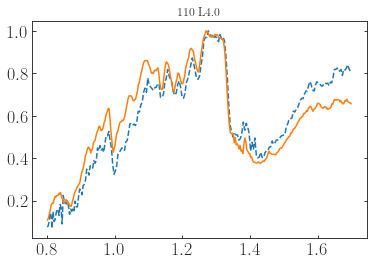

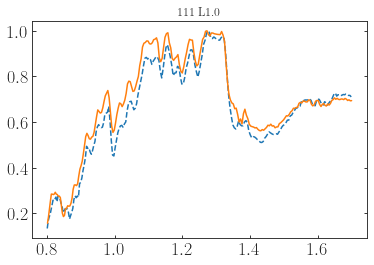

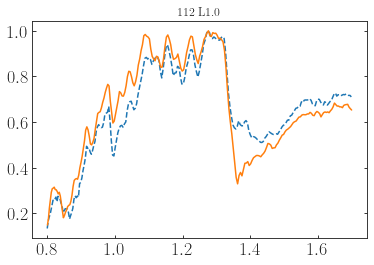

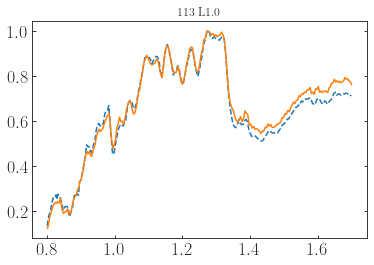

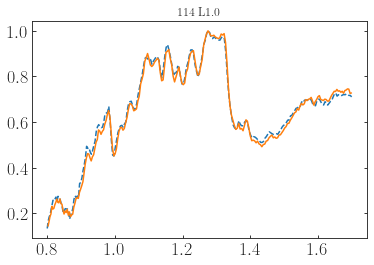

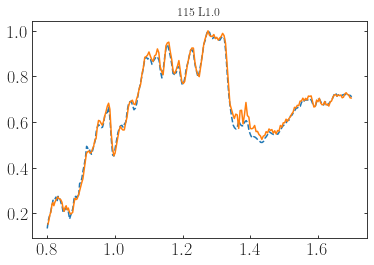

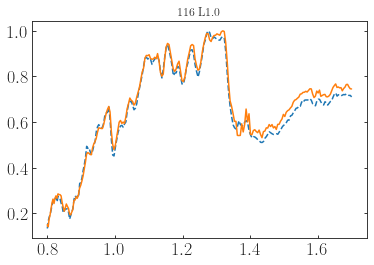

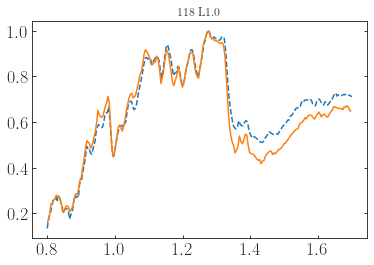

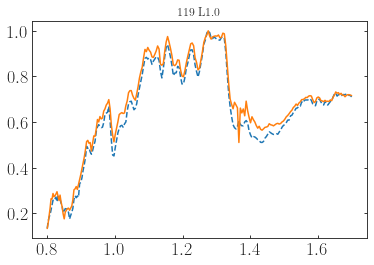

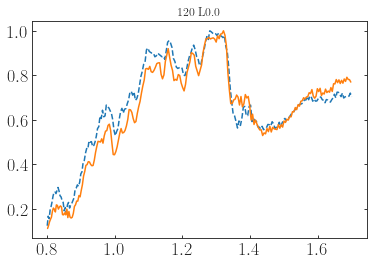

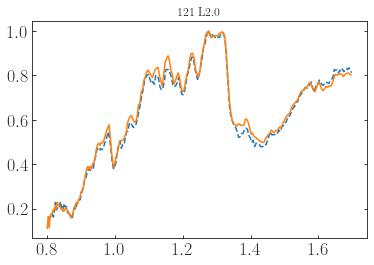

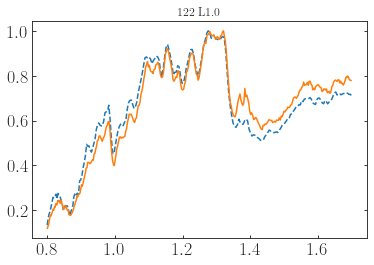

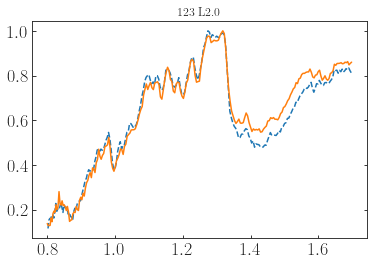

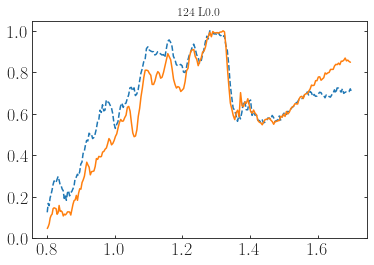

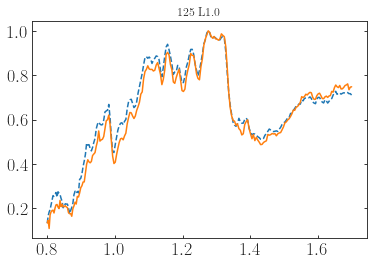

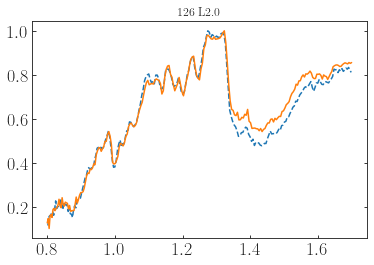

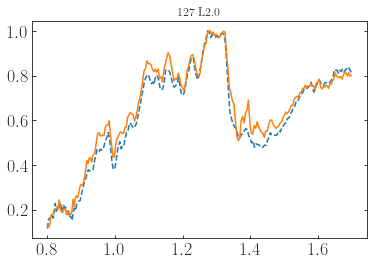

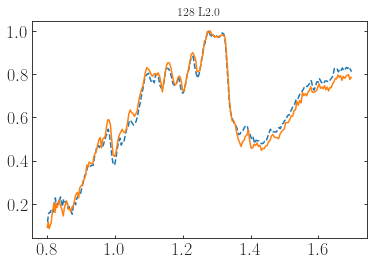

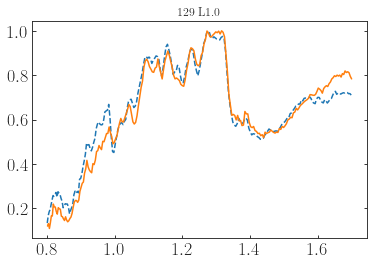

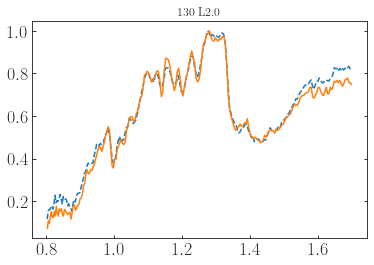

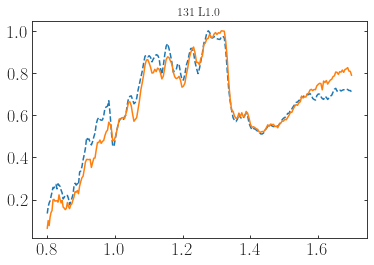

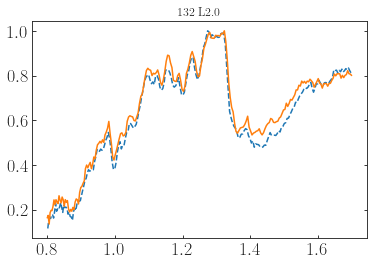

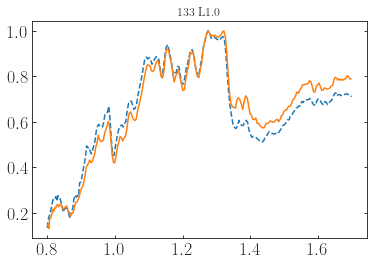

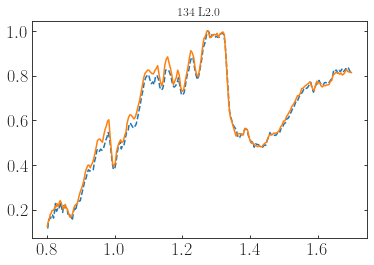

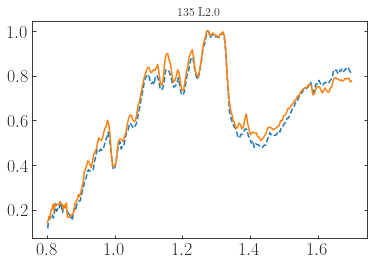

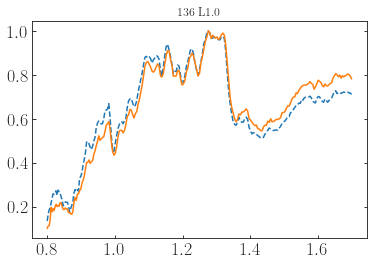

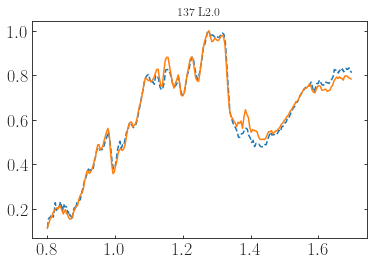

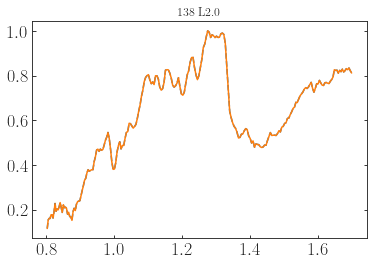

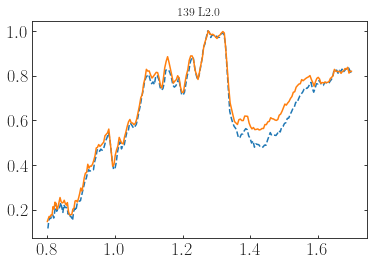

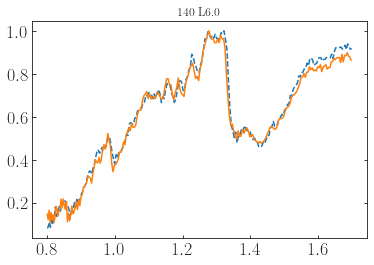

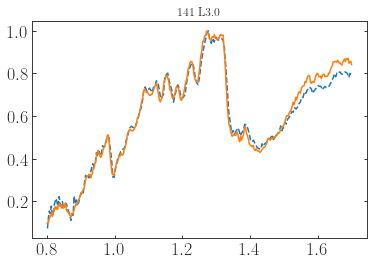

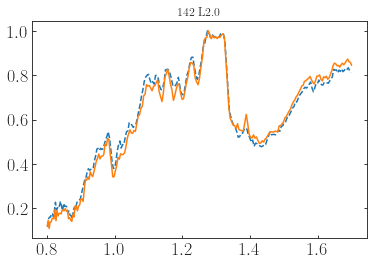

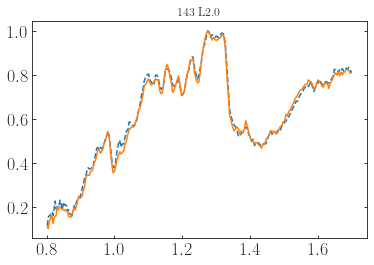

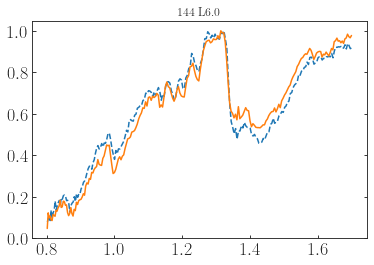

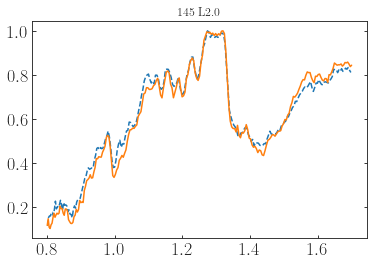

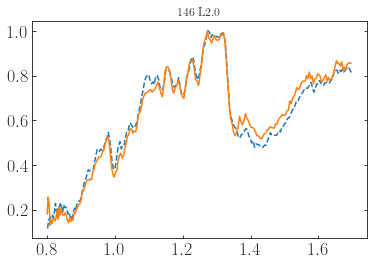

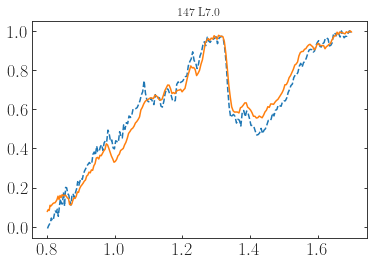

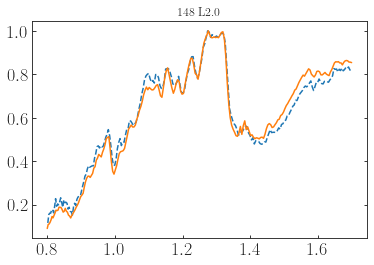

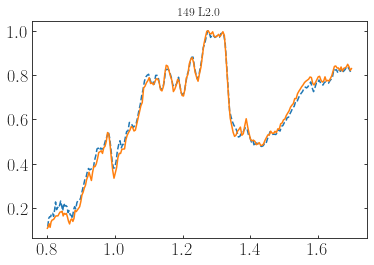

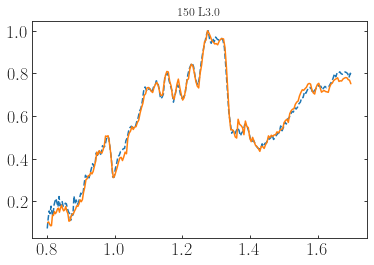

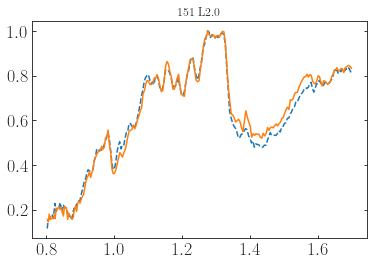

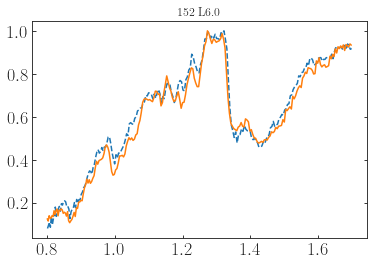

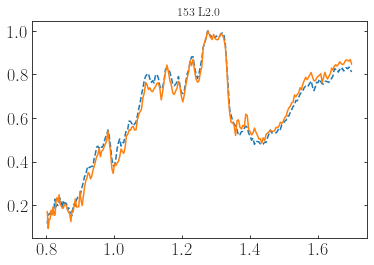

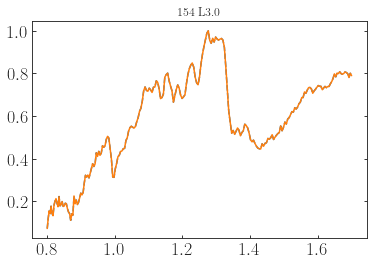

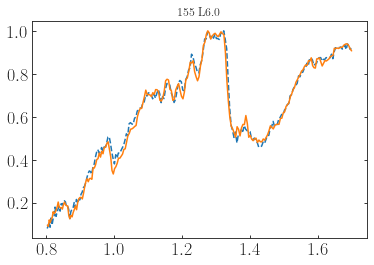

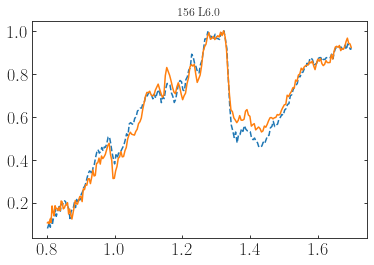

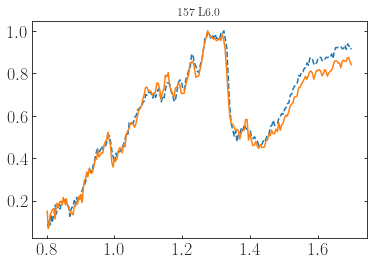

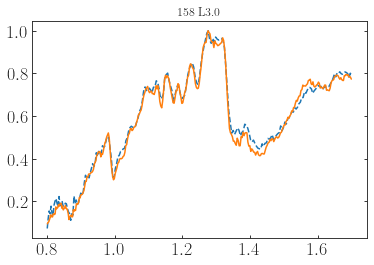

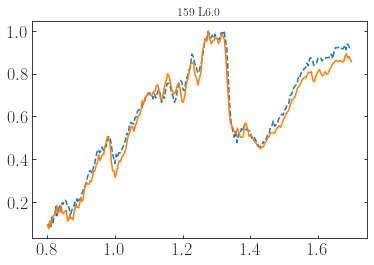

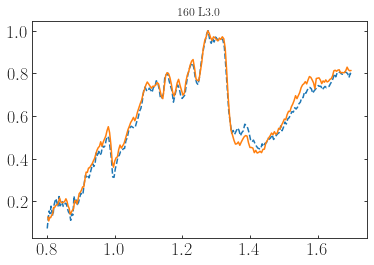

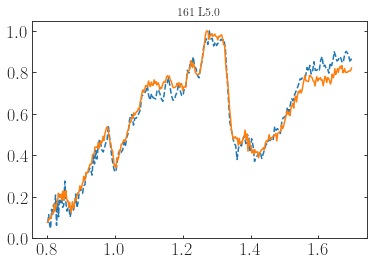

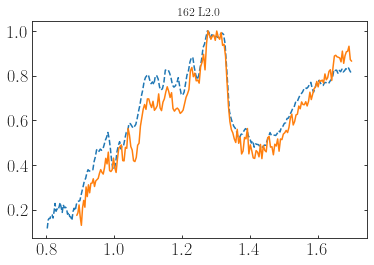

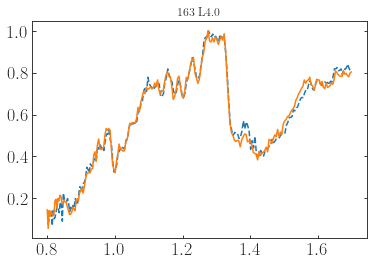

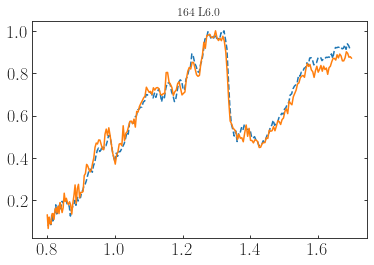

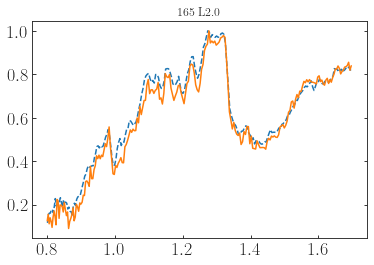

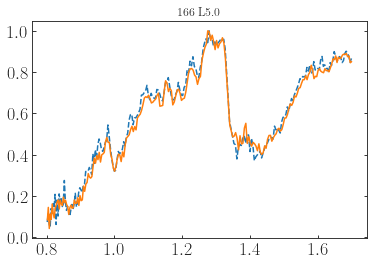

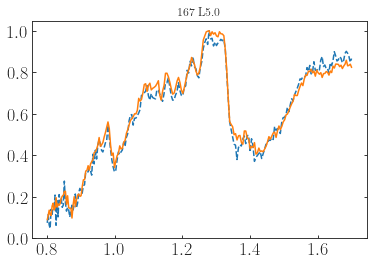

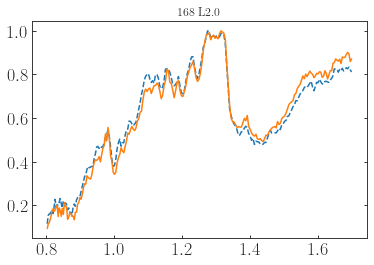

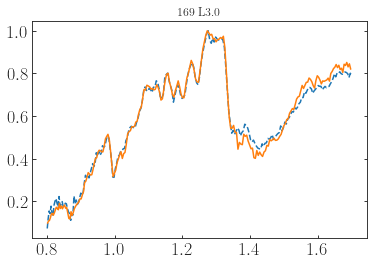

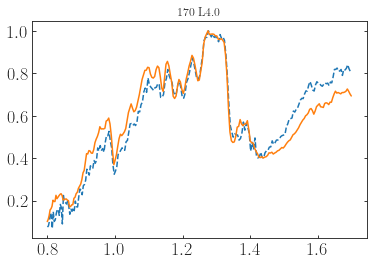

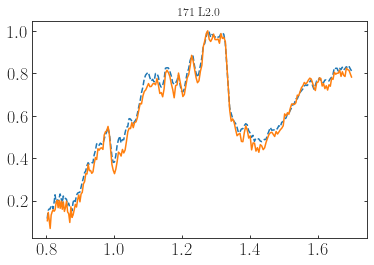

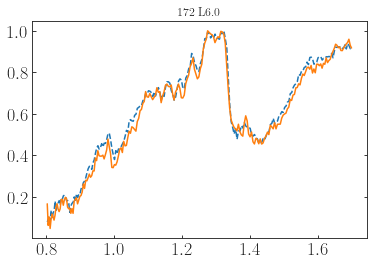

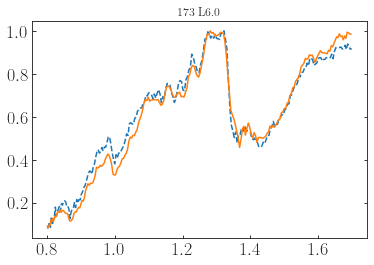

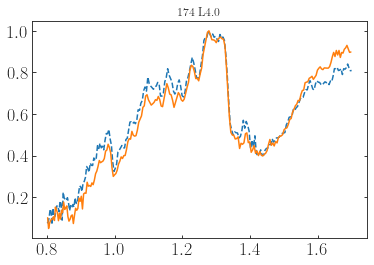

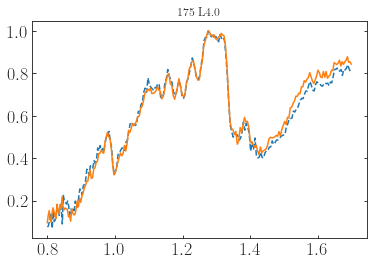

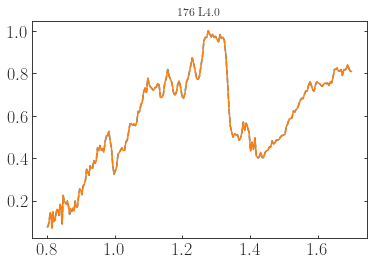

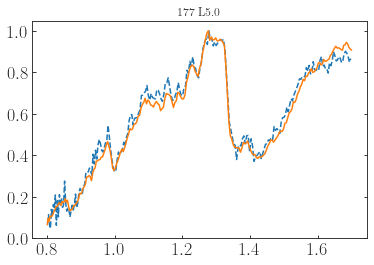

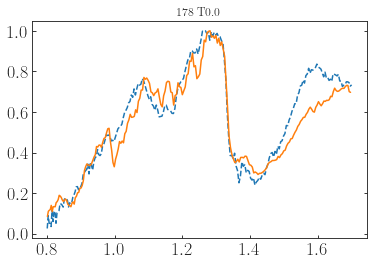

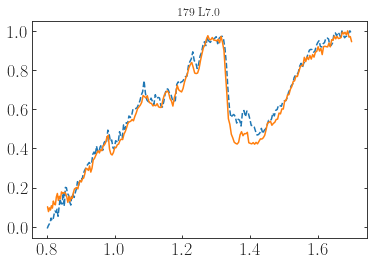

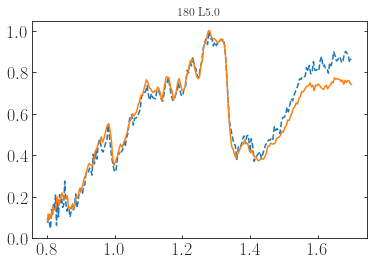

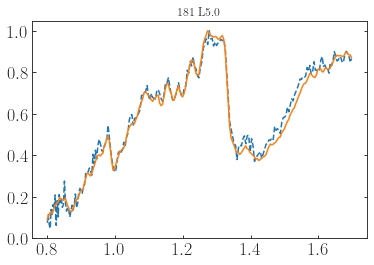

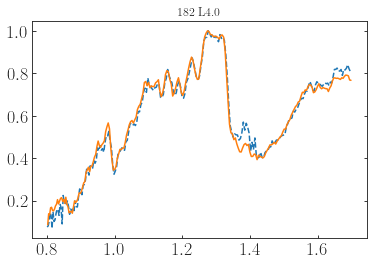

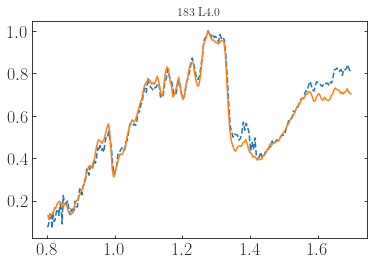

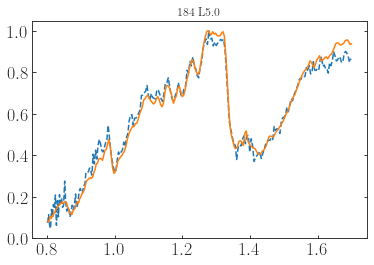

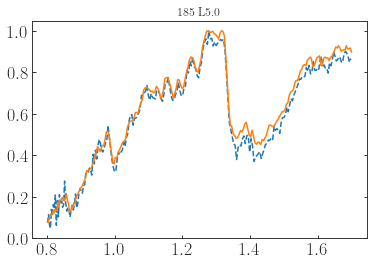

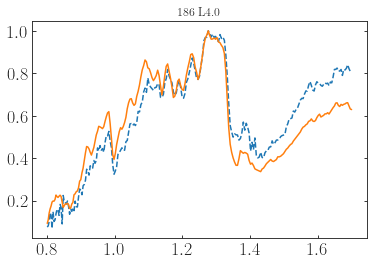

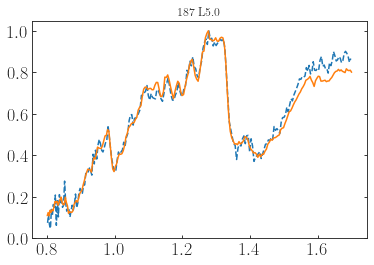

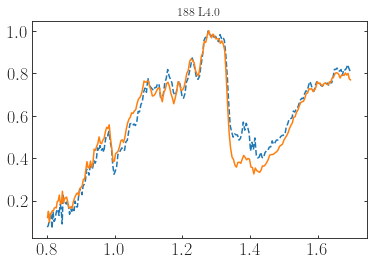

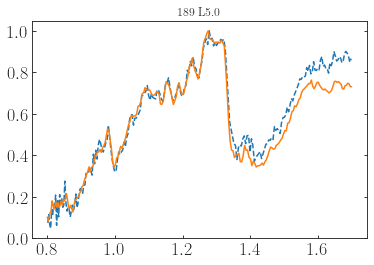

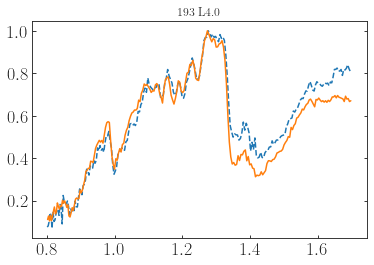

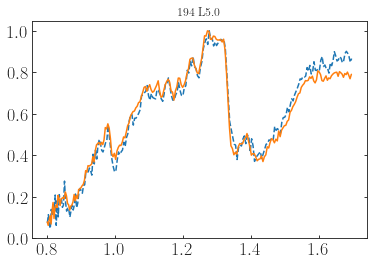

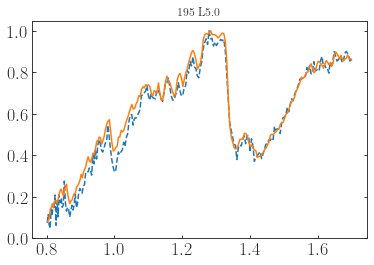

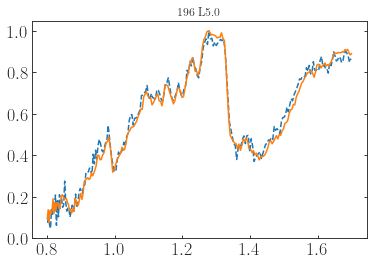

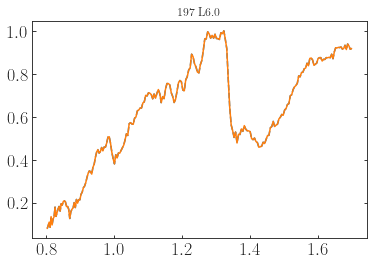

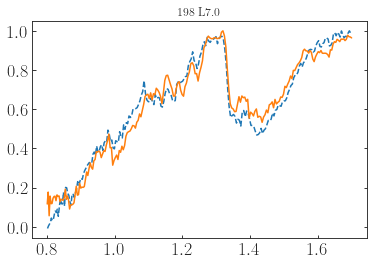

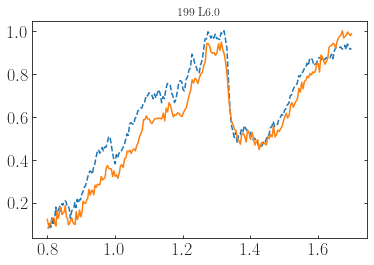

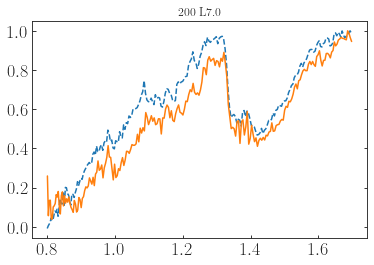

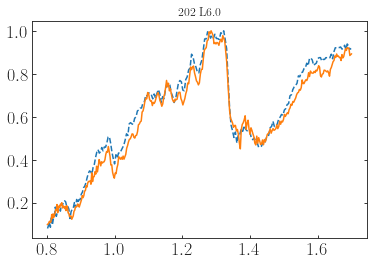

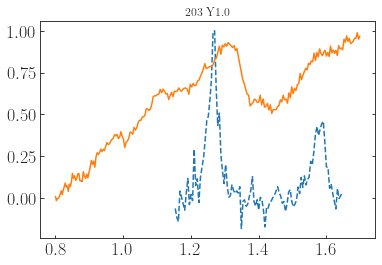

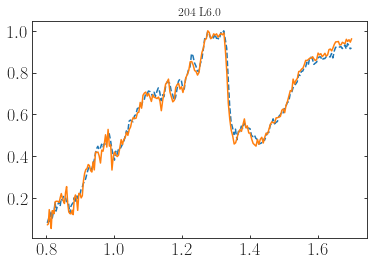

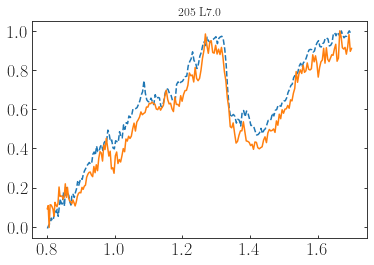

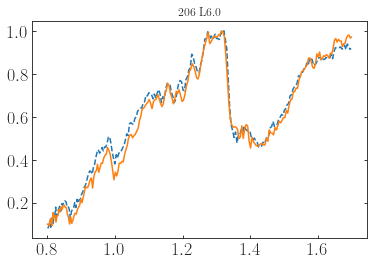

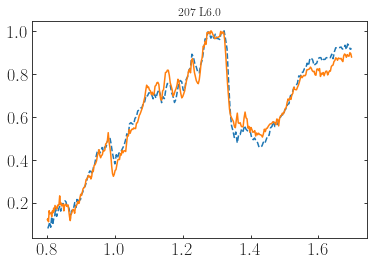

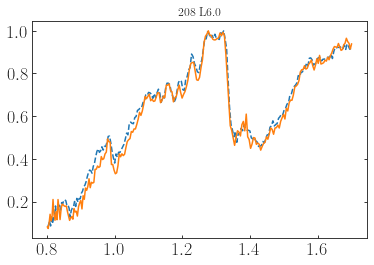

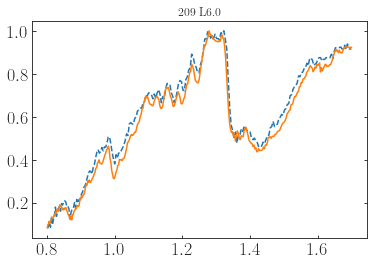

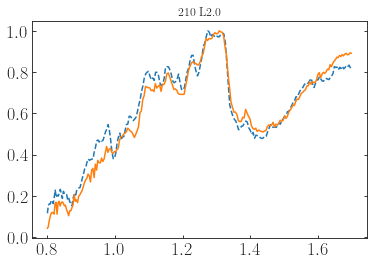

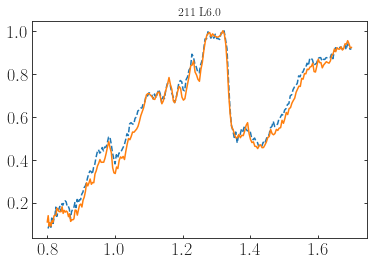

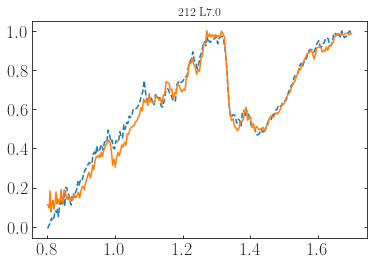

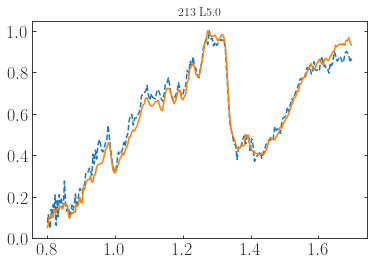

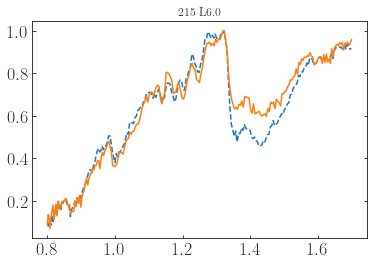

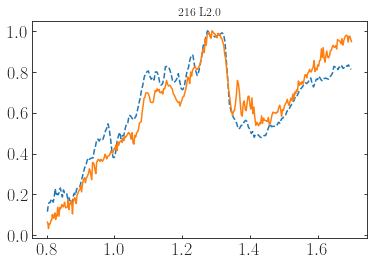

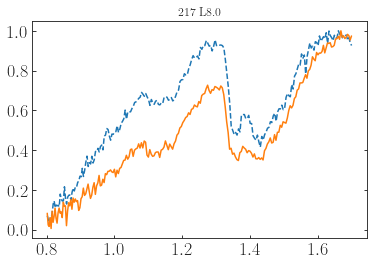

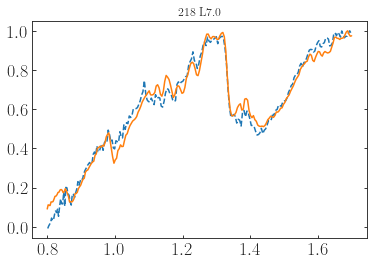

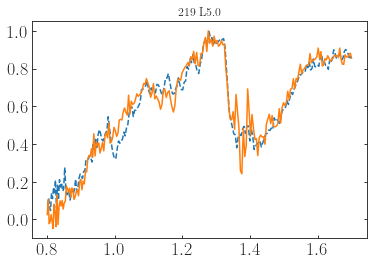

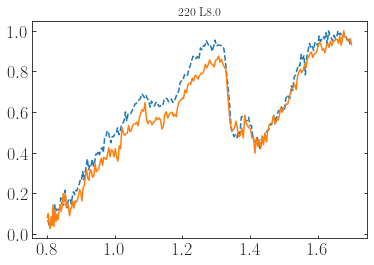

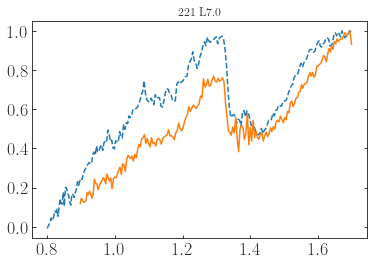

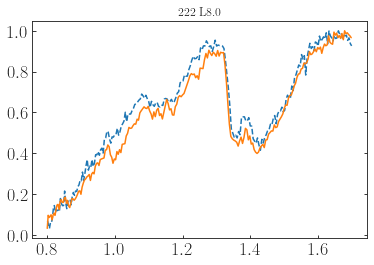

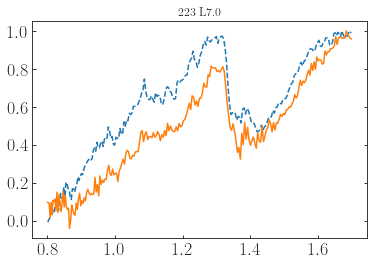

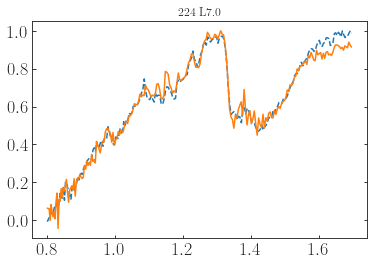

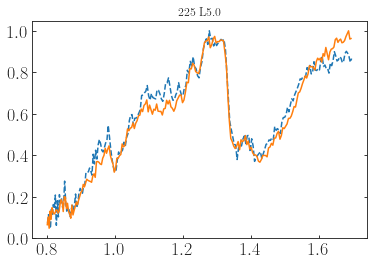

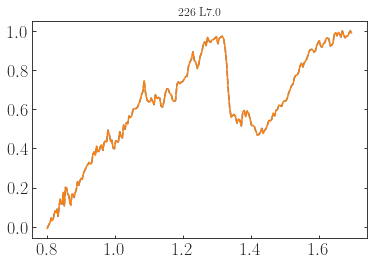

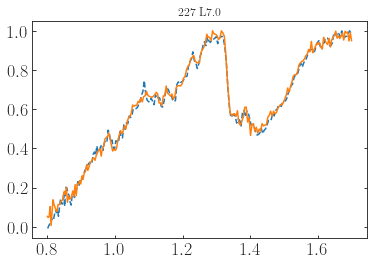

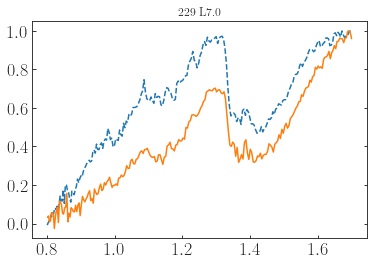

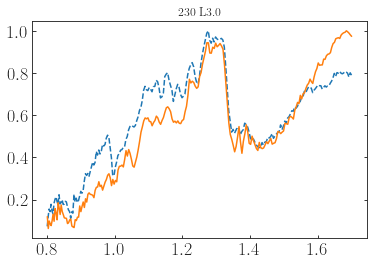

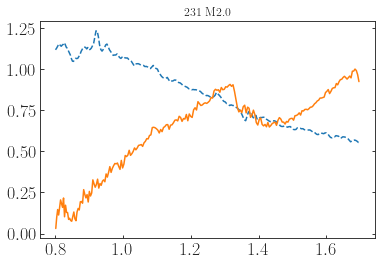

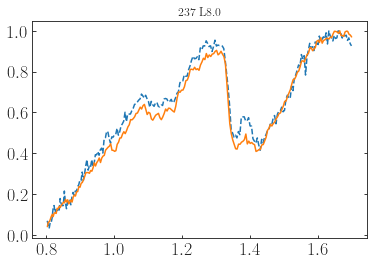

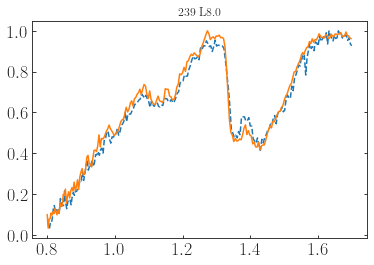

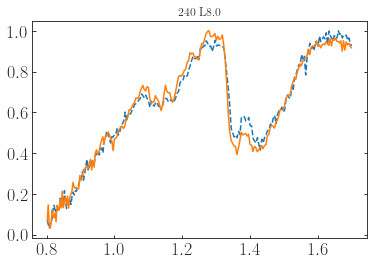

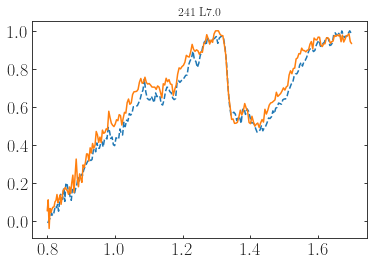

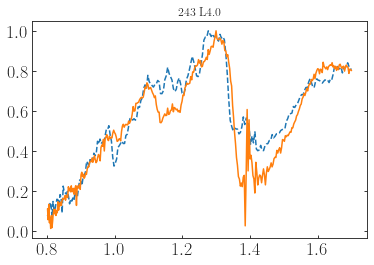

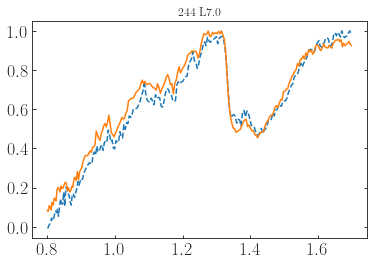

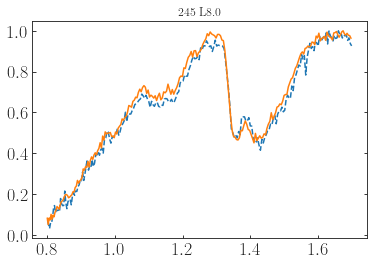

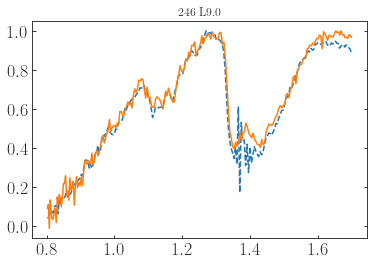

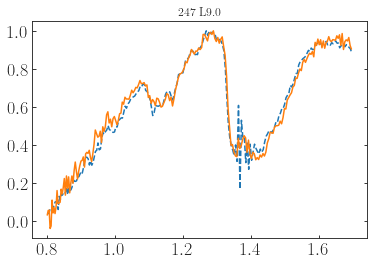

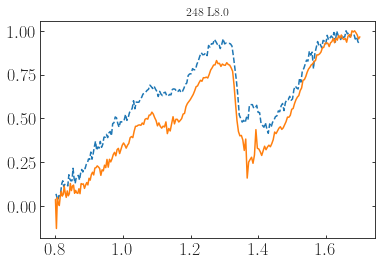

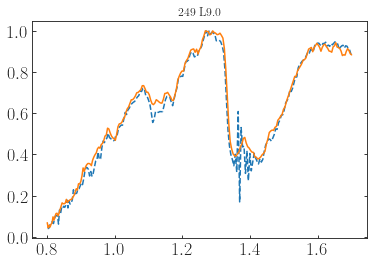

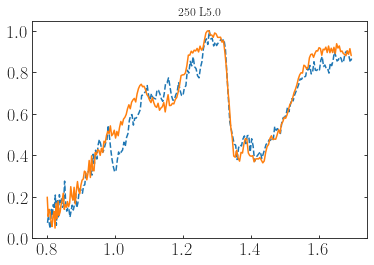

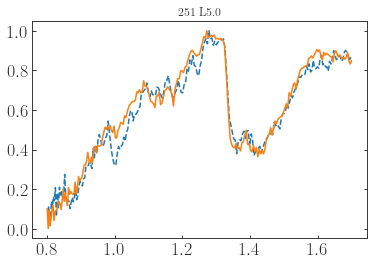

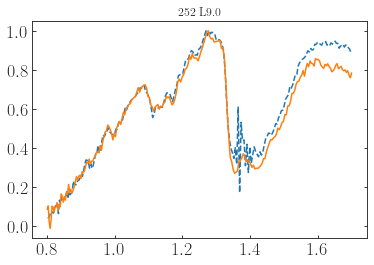

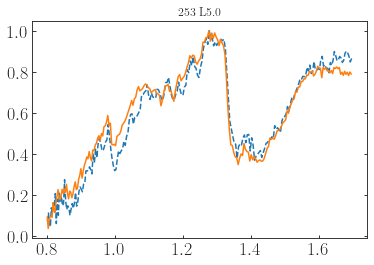

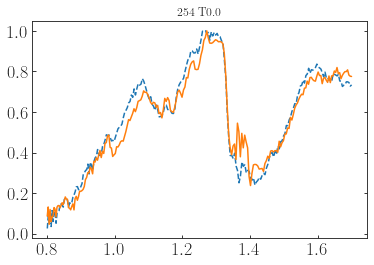

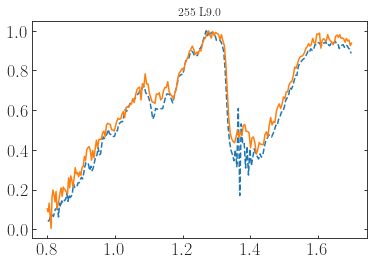

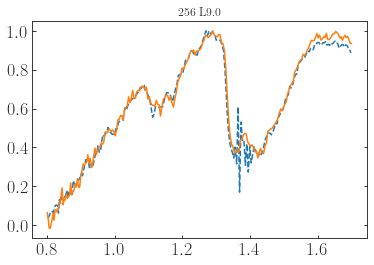

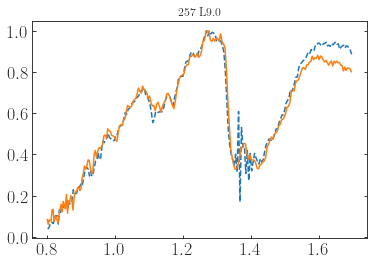

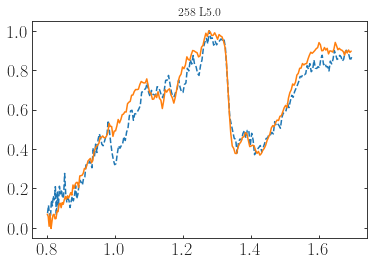

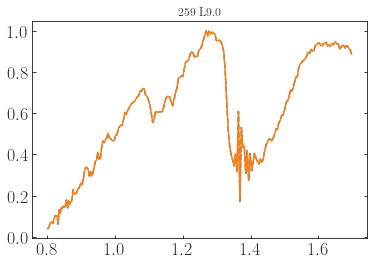

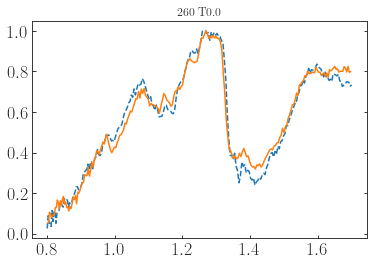

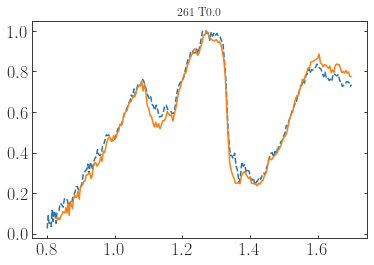

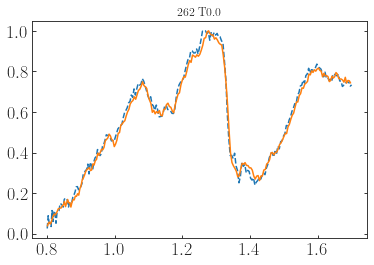

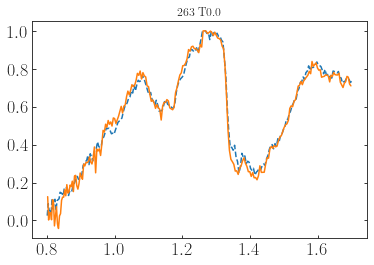

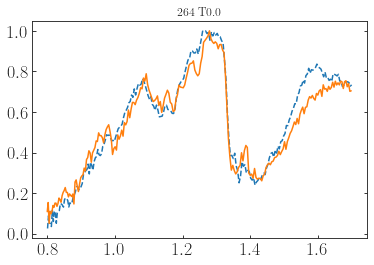

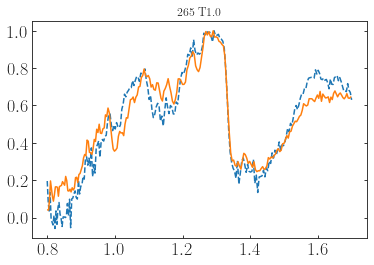

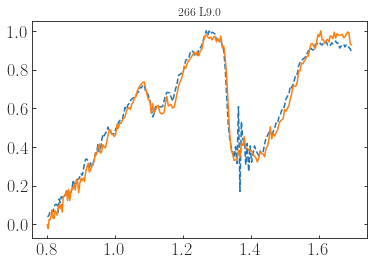

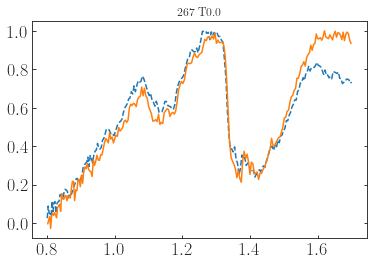

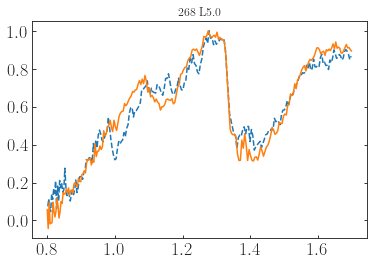

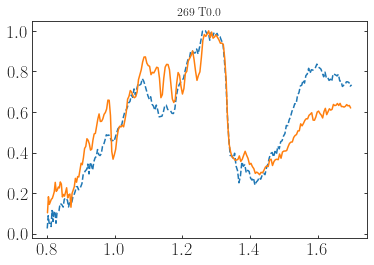

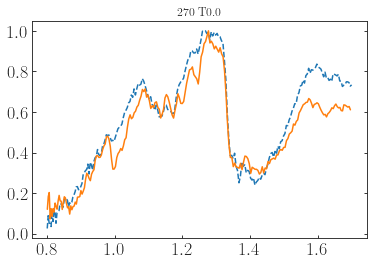

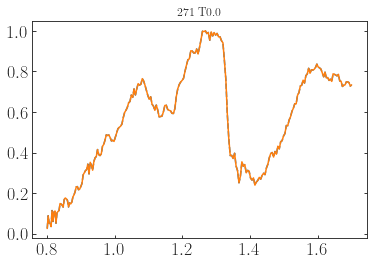

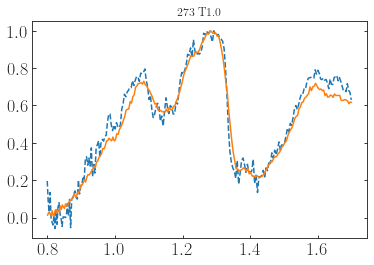

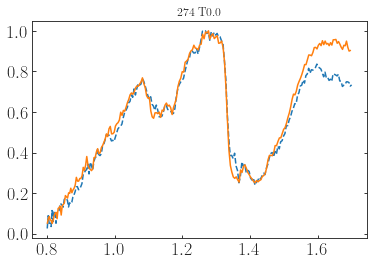

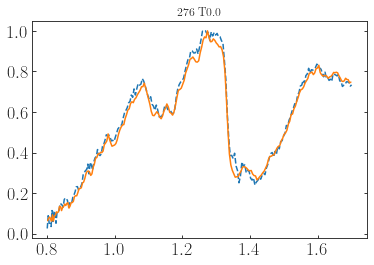

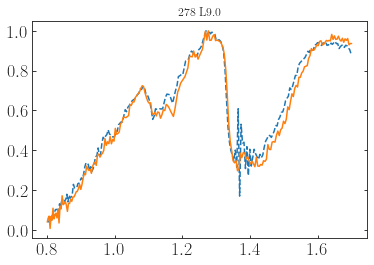

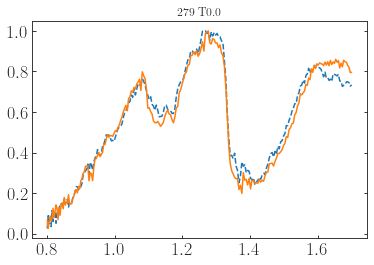

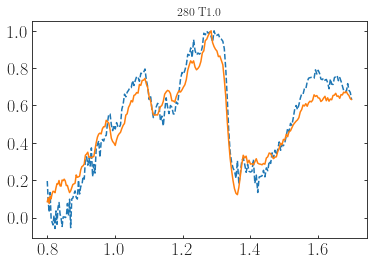

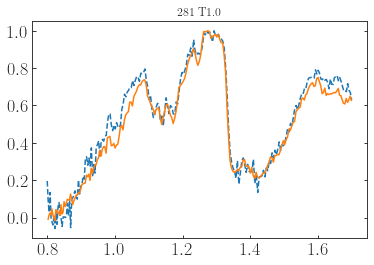

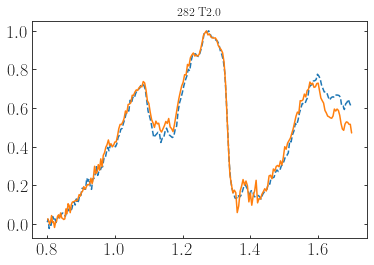

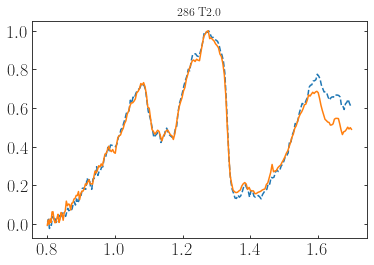

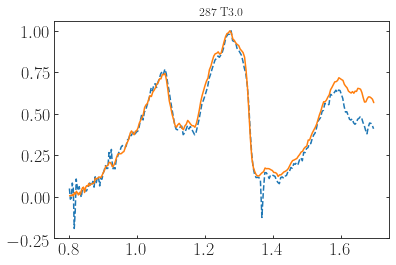

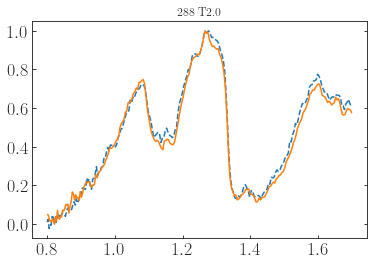

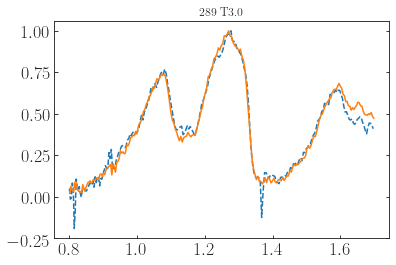

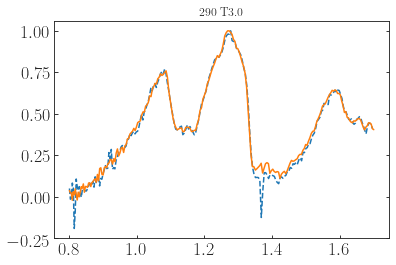

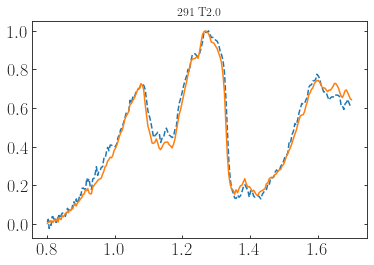

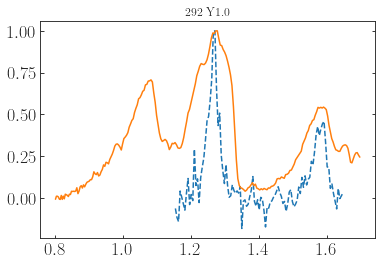

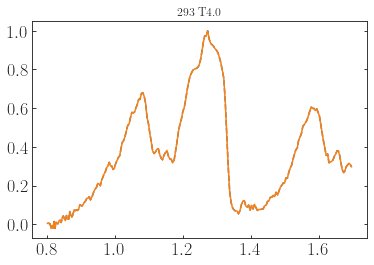

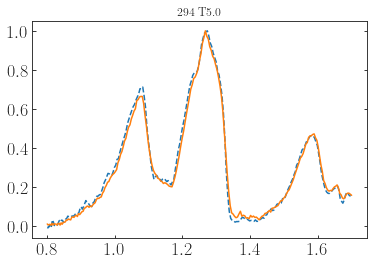

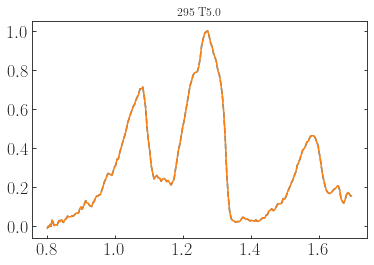

In [26]:
for idx, s in enumerate(spectra.dropna().values):
    s.normalize()
    fig, ax=plt.subplots()
    plot_sp_sp(s, ax)
    
        
            
    
   

In [27]:
def make_wisps(splat_s):
    s=wisps.Spectrum(wave=splat_s.wave.value, 
                       flux=splat_s.flux.value,
                      noise=splat_s.noise.value)
    return s

In [28]:
ydwarfs_data=pd.read_pickle('/users/caganze/y_standards.pkl')

In [29]:
ydwarfs_data.iloc[1].spec

WFC3-G141 spectrum of WISE0350-5658

In [30]:
t9s=splat.getSpectrum(spt='T9.0')
t8s=splat.getSpectrum(spt='T8.0')
t7s=splat.getSpectrum(spt='T7.0')
y0=ydwarfs_data.iloc[0].spec
y1=ydwarfs_data.iloc[1].spec


Retrieving 2 files


Retrieving 14 files


Retrieving 19 files



In [31]:
extras=[make_wisps(x) for x in np.concatenate([t9s, t8s, t7s, [y0], [y1]])]

13051.152
('T8.0', 276.9855019487129)
T8.0
155524.48
('T9.0', 1e-60)
T9.0
13133.979
('T7.0', 348.71145923677796)
T7.0
198984.1
('T8.0', 222.11252508969713)
T8.0
614277.3
('T8.0', 1e-60)
T8.0
3778.5168
('T8.0', 137.08819694397582)
T8.0
3673.0168
('T8.0', 126.73744463304033)
T8.0
44937.75
('T7.0', 186.59810488538744)
T7.0
55981.273
('T7.0', 463.9825105069964)
T7.0
133269.62
('T8.0', 1099.0719377998203)
T8.0
37333.332
('T8.0', 151.10363060924468)
T8.0
18833.697
('T7.0', 845.7180597323861)
T7.0
2.6794623e-28
('Y0.0', 1.543595134724029e-31)
Y0.0
24599.432
('T8.0', 162.8868542242079)
T8.0
8878.769
('T8.0', 502.48225651903317)
T8.0
35241.324
('T8.0', 439.1528831017258)
T8.0
95967.76
('T7.0', 692.7798810796265)
T7.0
118310.99
('T6.0', 826.5049350076458)
T6.0
44522.633
('T8.0', 538.3922152170452)
T8.0
74932.125
('T7.0', 633.5648477127802)
T7.0
391907.8
('T7.0', 1e-60)
T7.0
92468.19
('T7.0', 1177.1637579223557)
T7.0
6605.8857
('T7.0', 167.90634136394905)
T7.0
17879.596
('T6.0', 360.7749577549674

In [32]:
remove=[231]

In [33]:
retain=np.append(np.delete(spectra.dropna().values, remove), extras)

In [34]:
import pandas as pd
import wisps 

In [38]:
dfsp=pd.DataFrame()
dfsp['spectra']=retain
dfsp['spt']= [x.spt for x in retain]

In [44]:
takes=[]
for g in dfsp.groupby('spt'):
    takes.append(g[1].sample(1))

In [51]:
pd.concat(takes)

spectra   spt
124  anon spectrum  L0.0
100  anon spectrum  L1.0
168  anon spectrum  L2.0
141  anon spectrum  L3.0
163  anon spectrum  L4.0
167  anon spectrum  L5.0
155  anon spectrum  L6.0
221  anon spectrum  L7.0
238  anon spectrum  L8.0
265  anon spectrum  L9.0
3    anon spectrum  M4.0
1    anon spectrum  M5.0
23   anon spectrum  M6.0
30   anon spectrum  M7.0
41   anon spectrum  M8.0
78   anon spectrum  M9.0
278  anon spectrum  T0.0
280  anon spectrum  T1.0
287  anon spectrum  T2.0
284  anon spectrum  T3.0
292  anon spectrum  T4.0
295  anon spectrum  T5.0
314  anon spectrum  T6.0
299  anon spectrum  T7.0
311  anon spectrum  T8.0
298  anon spectrum  T9.0
309  anon spectrum  Y0.0
203  anon spectrum  Y1.0

In [52]:
import pickle
with open(wisps.OUTPUT_FILES+'/l_t_dwarfs_spex.pkl', 'wb') as file:
    pickle.dump(pd.concat(takes).spectra.values,file)